# ZADANIE 1

### Wykonaj w Pythonie poniższy skrypt i przeanalizuj go

In [26]:
from pylab import *
from numpy import *
import math

from ipywidgets import *
from numpy.fft import fft, ifft, fftfreq

**UWAGA**: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

In [48]:
#Tutaj dla wygody możesz powyższy kod zawrzeć w postaci funkcji wielu parametrów
def rysuj_fale(A=1, F=50, lp=1, w=40):
    T = 1/F
    TW = 1/w
    f = lambda t : A * sin(2*pi*t*F)
    rysuj_sygnal(f, 0, lp*T, TW)
    
def fftfreq2(N, w=1):
    if N==1:
        return [0]
    
    if N%2==0:
        n = N
        q = -1
    else:
        n = N-1
        q = 0
    a = np.arange(0, n/2+q+1, 1)
    b = np.arange(-n/2, 0 ,1)
    return np.hstack((a,b))/(n*w)

def rysuj_sygnal(f, x1=0, x2=1, krok=0.1):
    x_dots = np.arange(x1,x2,krok)
    y_dots = f(x_dots)
    N = len(y_dots)
    w = 1/krok
    
    x_wave = np.linspace(x1,x2,500)
    y_wave = [f(x) for x in x_wave]
    
    x_fft = fftfreq2(N, 1 / w)
    y_fft = np.abs(fft(y_dots)) * 2 / N
    
    fig = plt.figure(figsize=(20, 10))   
    ax = fig.add_subplot(121)
    ax.plot(x_dots, y_dots, 'o')
    ax.plot(x_wave, y_wave, '-', color='red')
    
    ax.set_xlabel('Czas')
    ax.set_ylabel('Amplituda')
    
    ax = fig.add_subplot(122)
    plt.stem(x_fft, y_fft, '*')
    
    ax.set_xlabel('Częstotliwość')
    ax.set_ylabel('Amplituda')
    plt.show()

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [3]:
def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)

interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

### b) Zmień częstotliwość próbkowania na 50Hz.

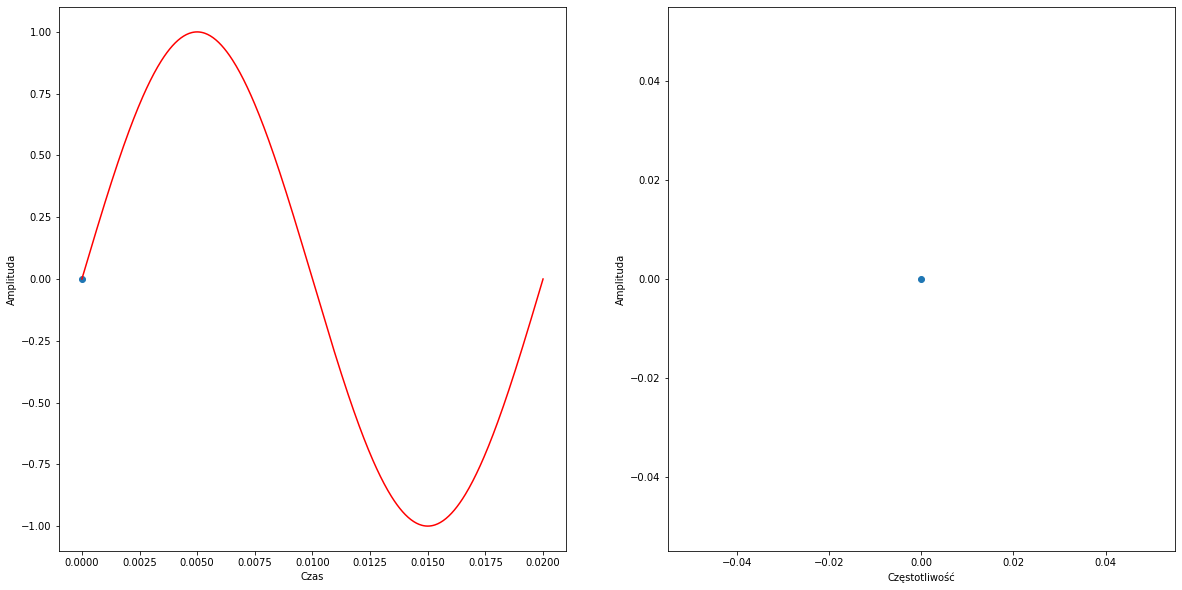

In [49]:
# w=50
rysuj_fale(w=50)

### c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

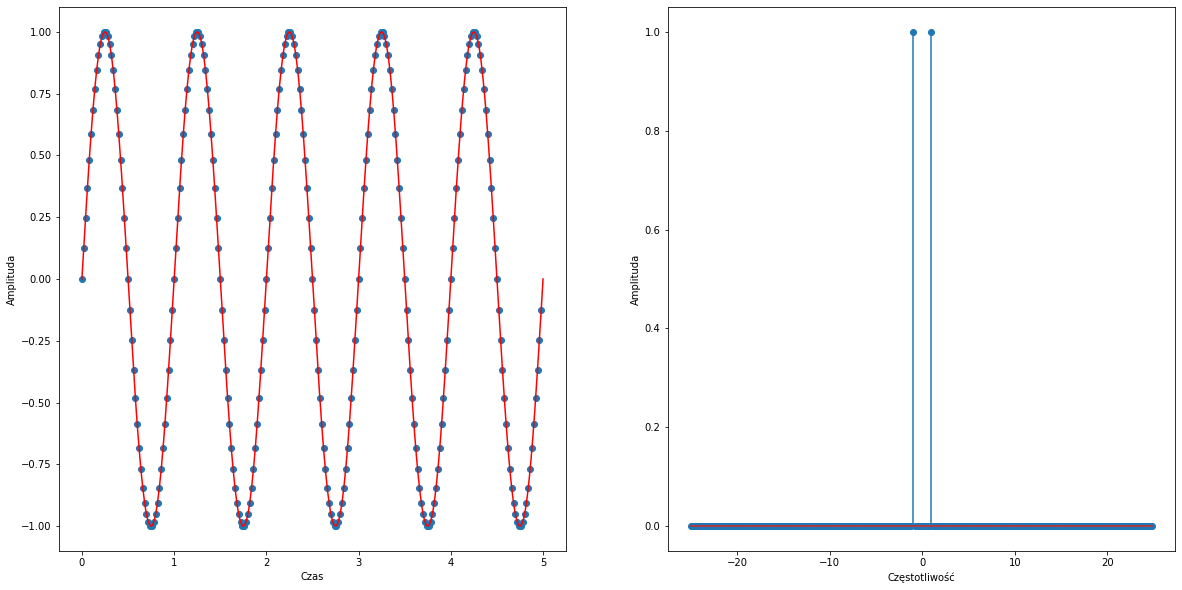

In [50]:
# popraw oś OX
rysuj_fale(F=1,lp=5,w=50)

### d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [ ]:
# Podpisz osie wykresów

### e) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

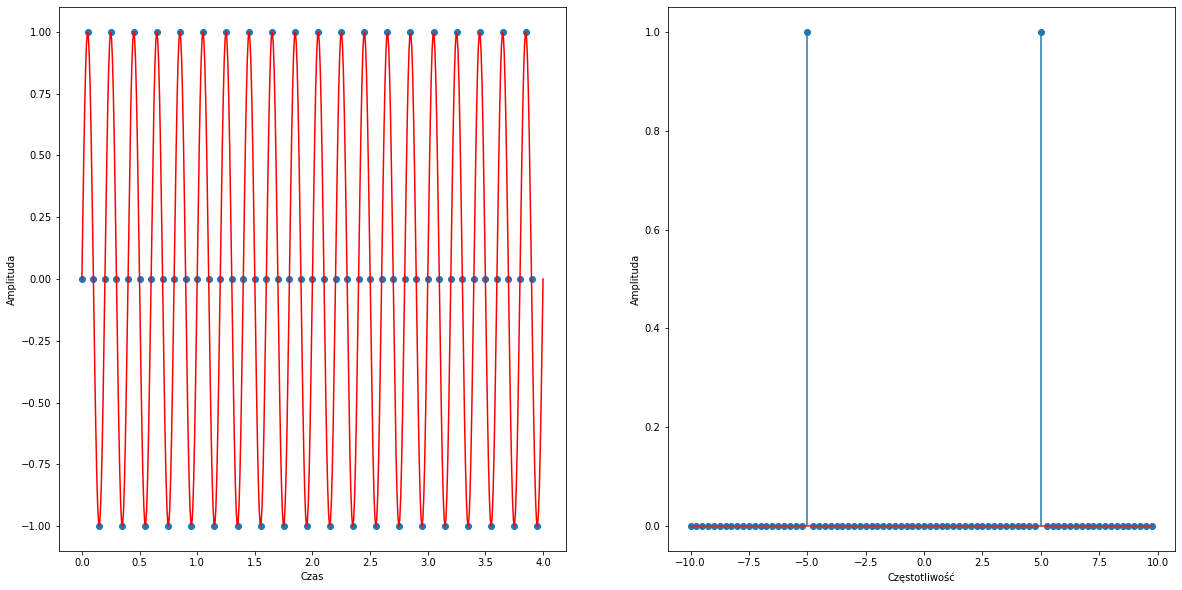

In [52]:
# F=5, w=20, LP=20
rysuj_fale(F=5,w=20,lp=20)

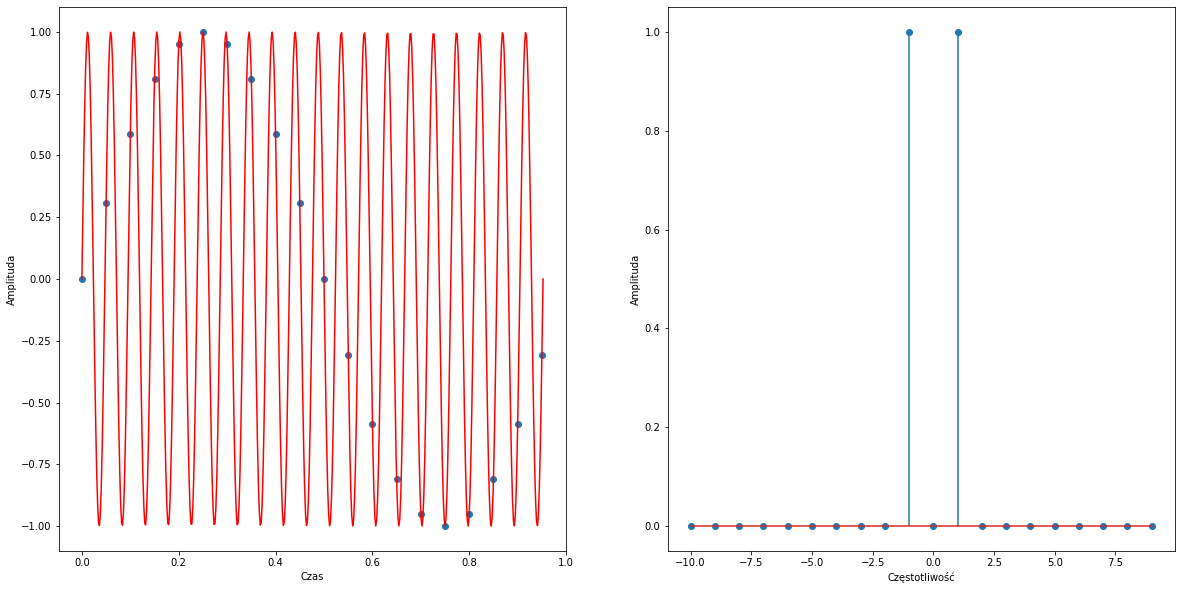

In [53]:
# F=21, w=20, LP=20
rysuj_fale(F=21,w=20,lp=20)

### f) Porównaj spektrum funkcji $sin(F*2\pi t)$, $2sin(F*2\pi t)$ i $3sin(F*2\pi t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

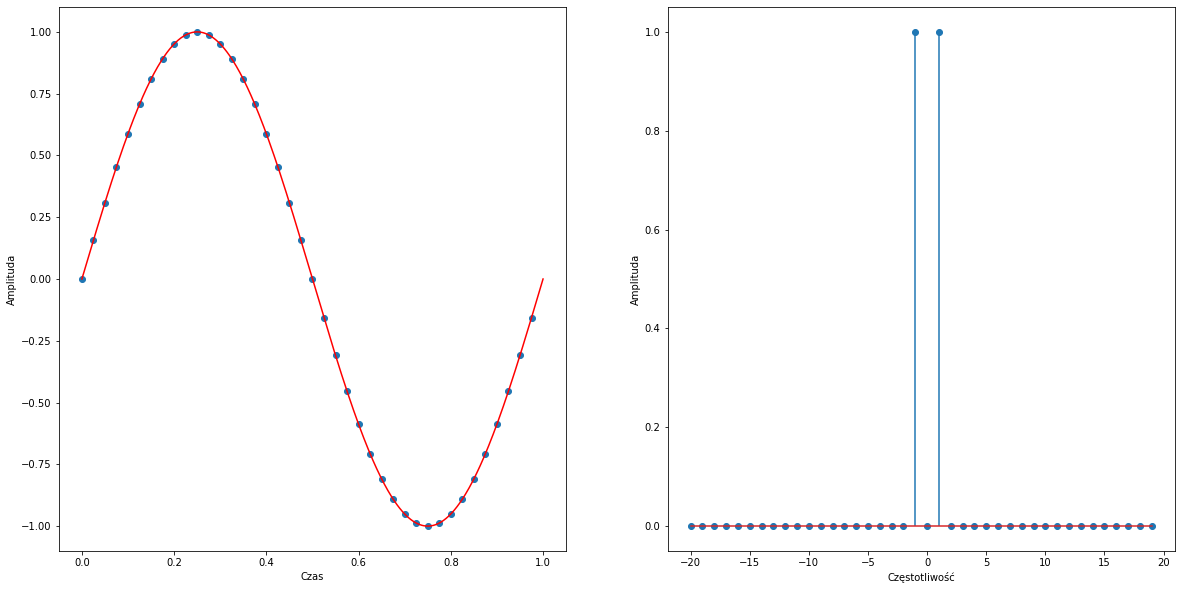

In [55]:
# F=1, A=1, LP=1
rysuj_fale(F=1,A=1,lp=1)

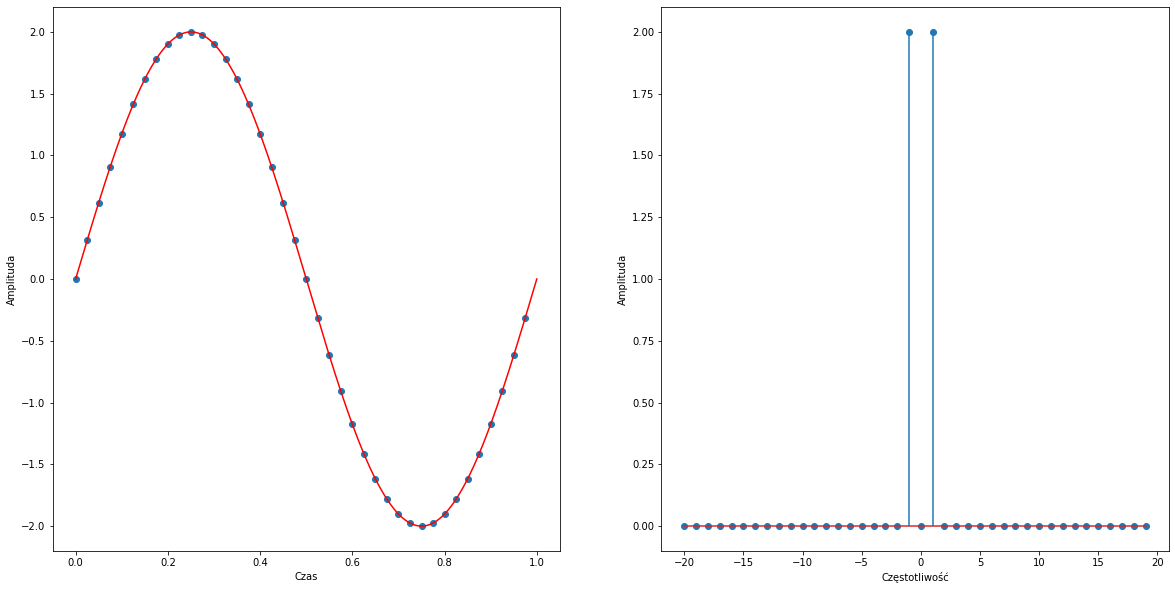

In [56]:
# F=1, A=2, LP=1
rysuj_fale(F=1,A=2,lp=1)

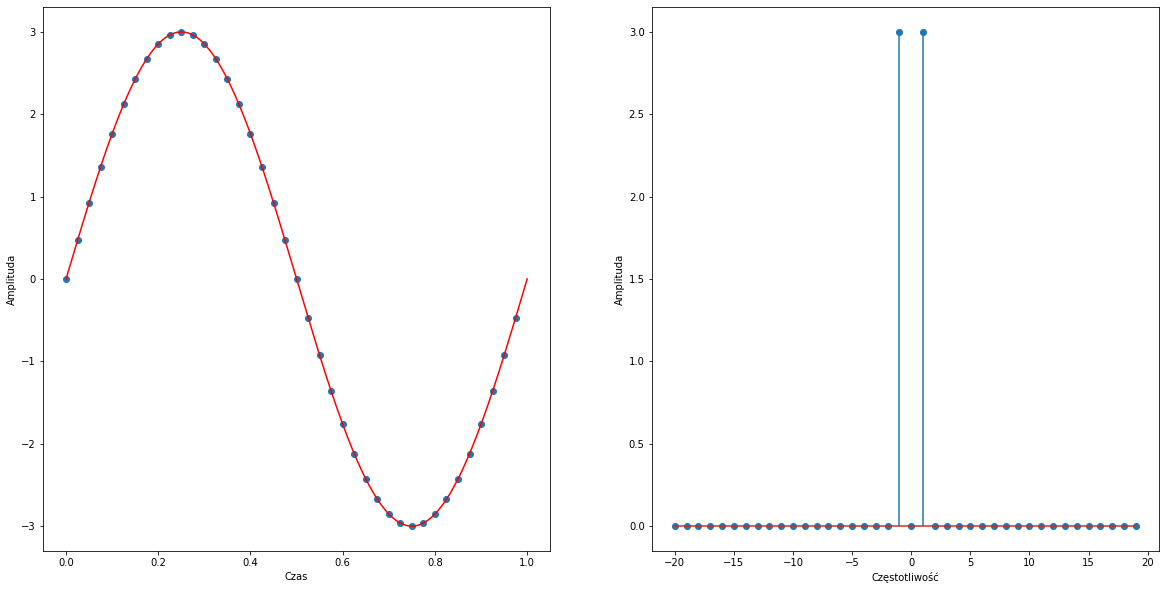

In [57]:
# F=1, A=3, LP=1
rysuj_fale(F=1,A=3,lp=1)

### g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, $T=1s$? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(F*2\pi t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

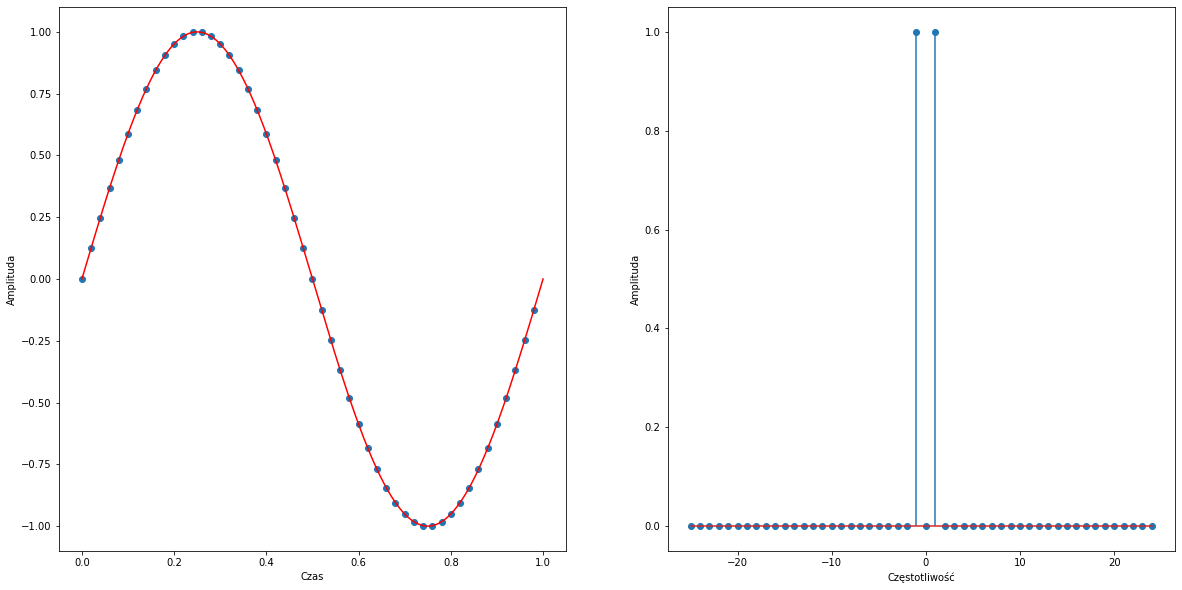

In [58]:
# F=1, w=50, LP=1
rysuj_fale(F=1,w=50,lp=1)

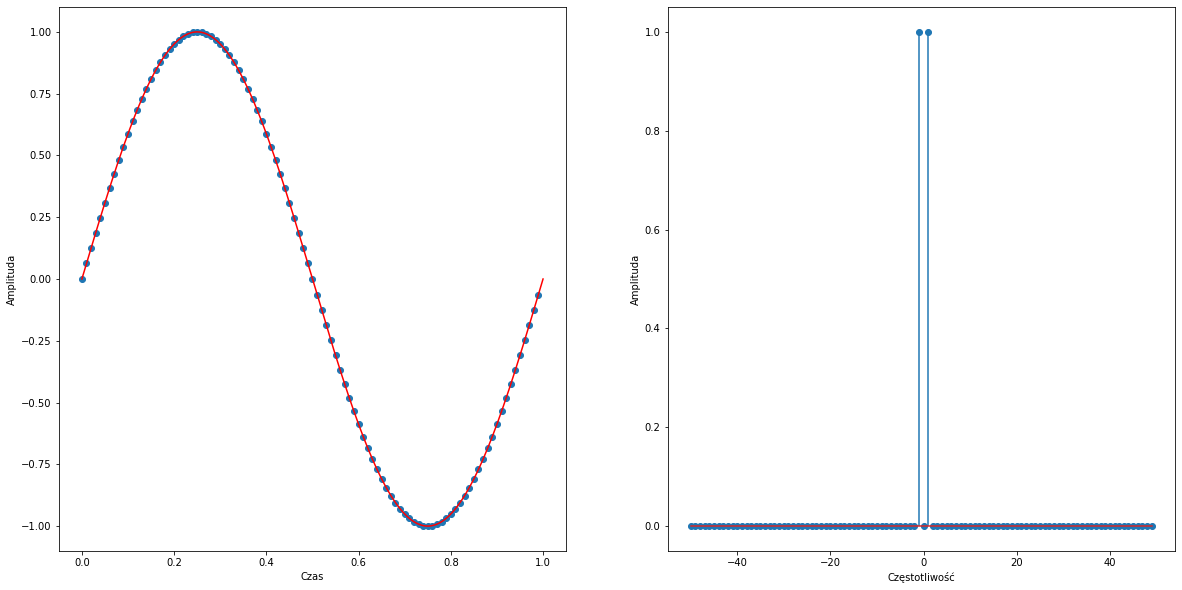

In [59]:
# F=1, w=100, LP=1
rysuj_fale(F=1,w=100,lp=1)

### h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji (tu fajnie użyć interact), częstotliwości próbkowania oraz rozważanych liczb punktów. Pamiętaj o wysokim LP.

In [ ]:
# popraw oś OY

# Zadanie 2

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

a) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(F*2\pi t)$, $F=10Hz$

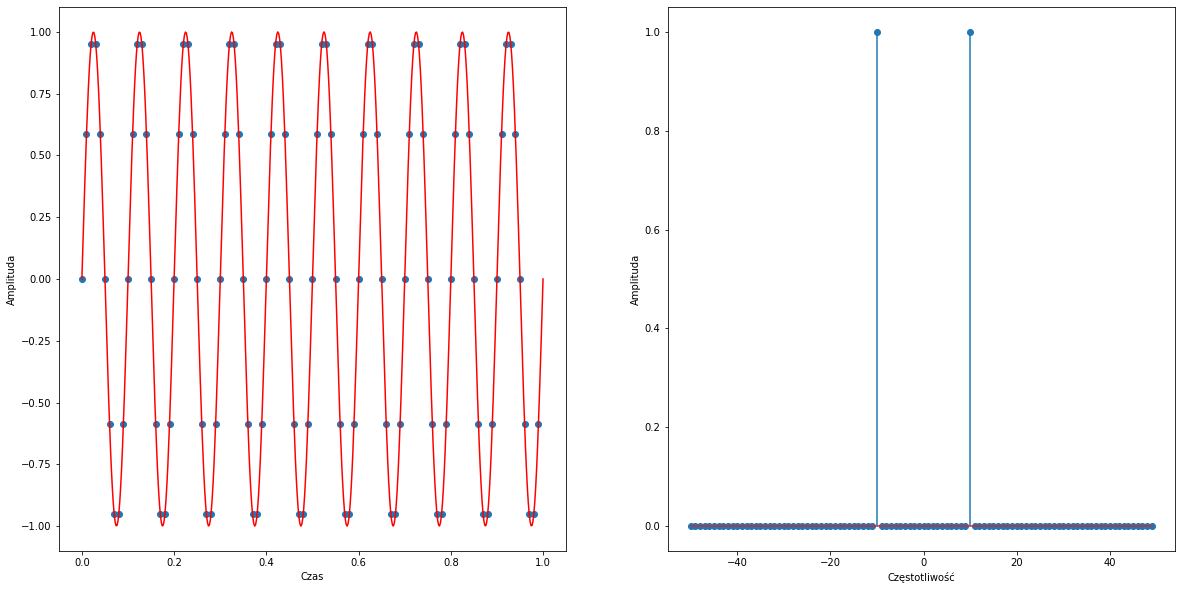

In [60]:
# f=10, w=100, A=1, LP=10
rysuj_fale(F=10, w=100, A=1, lp=10)

ii) $sin(F*2\pi t)$, $F=20Hz$

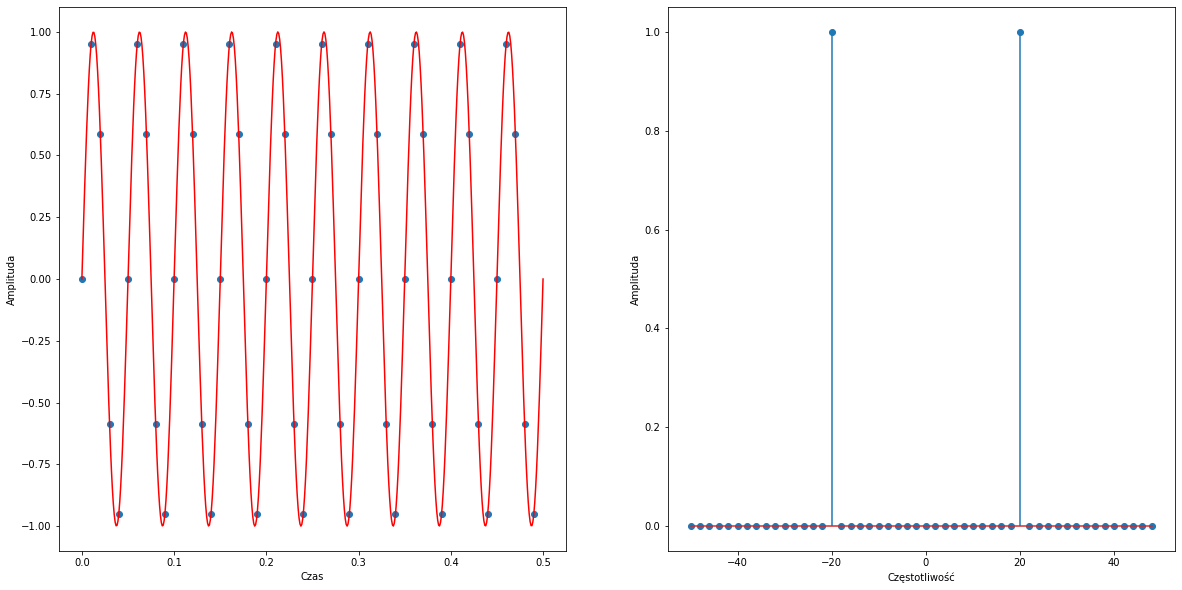

In [61]:
# f=20, w=100, A=1, LP=10
rysuj_fale(F=20, w=100, A=1, lp=10)

iii) $sin(2*pi*t*f)$, $f=30Hz$

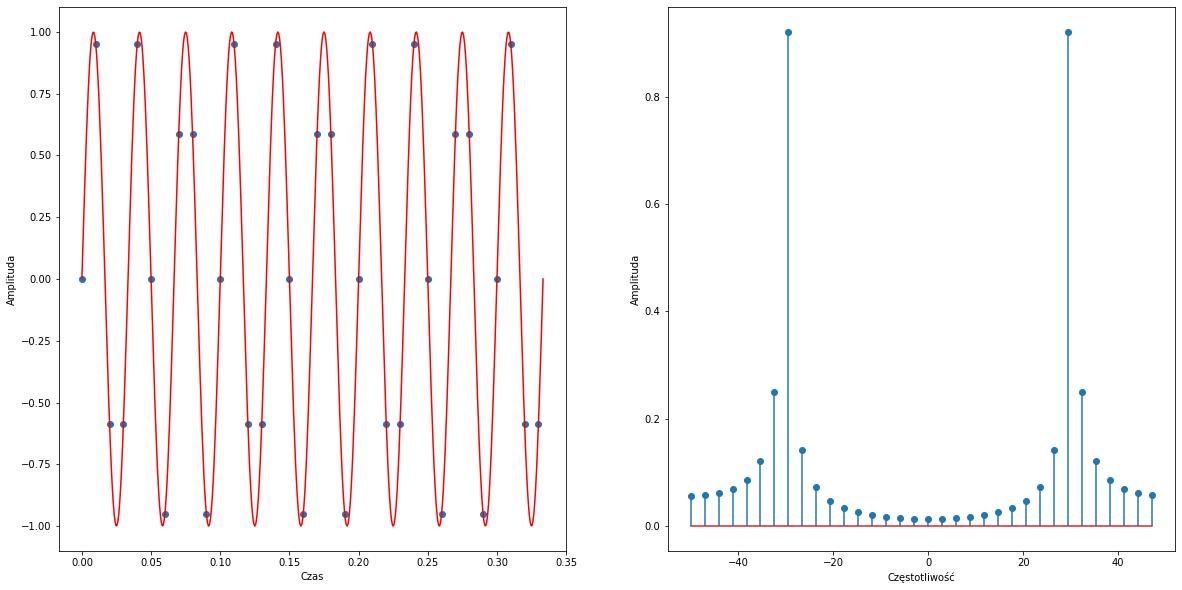

In [62]:
# f=30, w=100, A=1, LP=10
rysuj_fale(F=30, w=100, A=1, lp=10)

iv) $sin(2*pi*t*f)$, $f=40Hz$

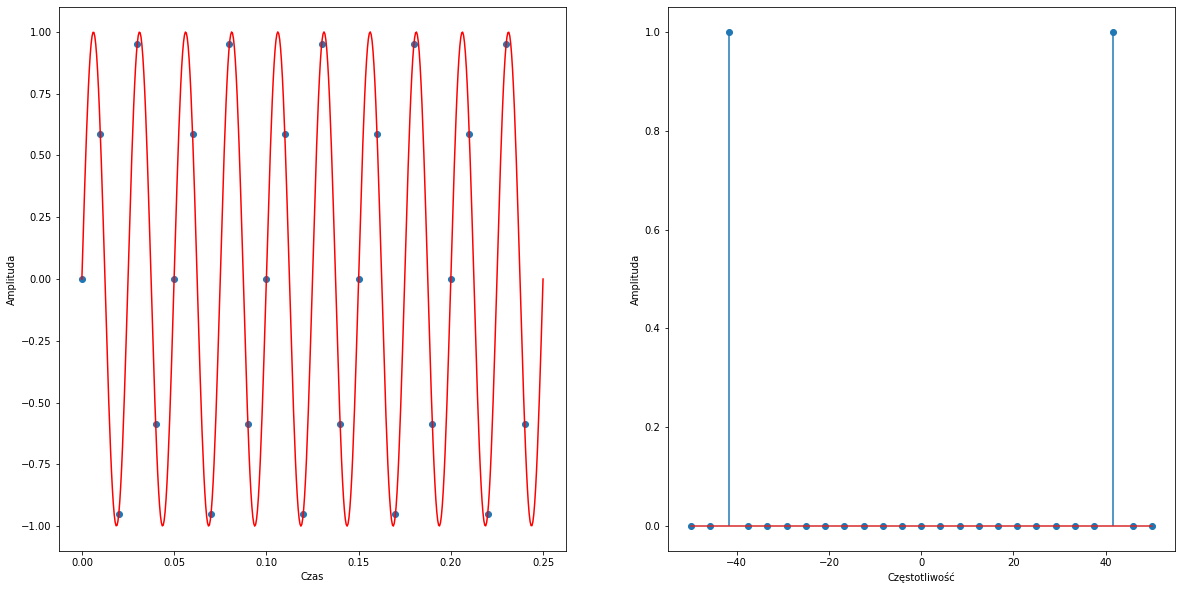

In [63]:
# f=40, w=100, A=1, LP=10
rysuj_fale(F=40, w=100, A=1, lp=10)

### b) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

### c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

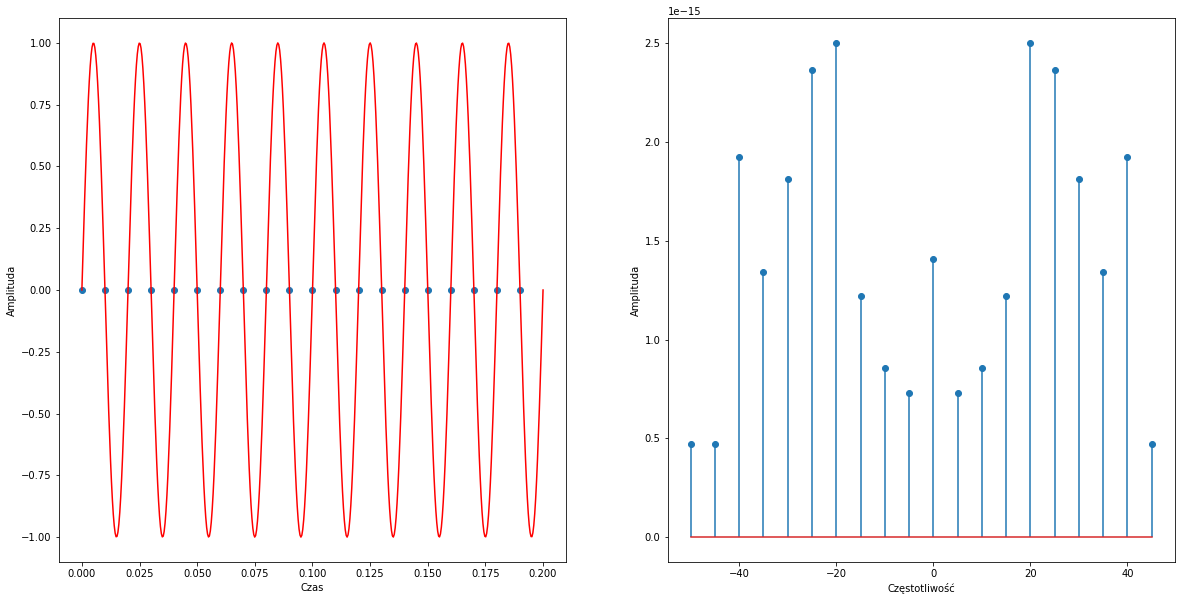

In [64]:
# f=50, w=100, A=1, LP=10
rysuj_fale(F=50, w=100, A=1, lp=10)

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Jeżeli stworzyłeś/aś na początku funkcję odpowiedzialną za rysowanie sygnału i FFT, możesz ją zmodyfikować tak, by jako jej argument podawać funkcję lambda, realizującą sygnał.

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

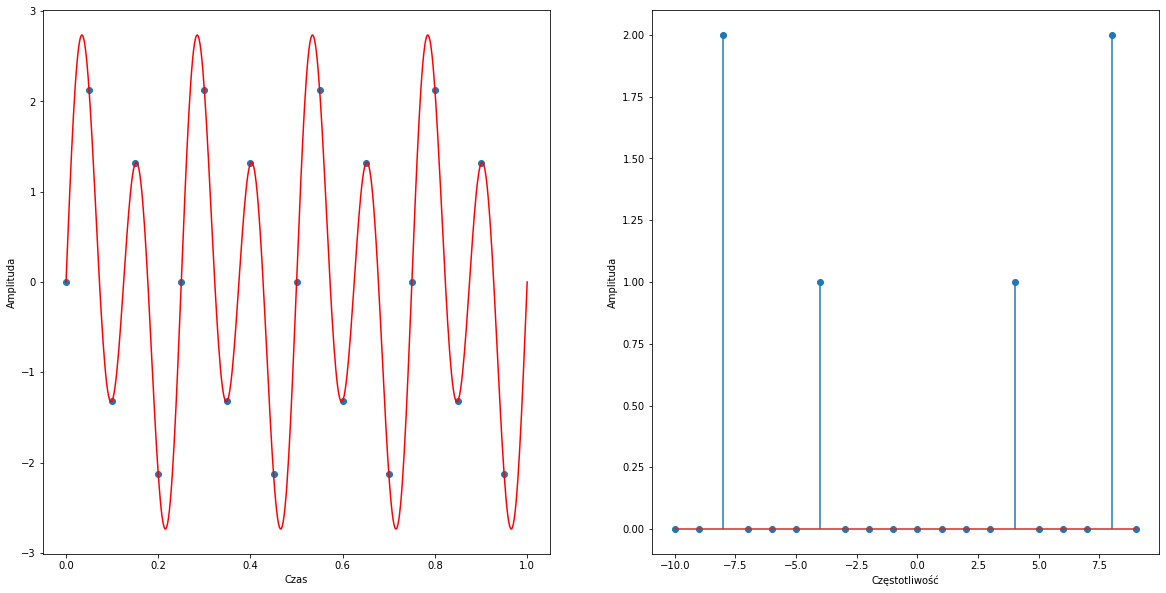

In [68]:
# Wyrysuj sygnał
def rysuj_fale2(f, T, lp=1, w=40):
    func = lambda t: sin(2*pi*t*f) + 2*sin(4*pi*t*f)
    rysuj_sygnal(func, x2=lp*T, krok=1/w)
    
rysuj_fale2(f=4, T=1, w=20)

### c) Wygenerujemy trochę szumu. Wychodząc z funkcji sin(2*2*pi*t*f), dodamy do niej 100 losowych sinusów. Wygenerujemy dla nich losowo amplitudy (z [0.1, 0.3], częstotliwosci: [2.0, 4.0] oraz modyfikacje fazy[0 + math.pi]. Jeżli utworzyłeś/aś funkcje lambda wcześniej, śmiało możesz ją podmienić na 'zwyczajną funkcję', która będzie realizować sumowanie losowych sinusów. Inne parametry: w=20Hz, T=1s. Czy dla powyższych paramerów losowania, jesteś w stanie odnaleźć bazowy przebieg (sin(2*2*pi*t))? (Jeżeli wykorzystujesz podany na początku kod, to nie przejmuj się, że pełen sygnał i sprókowany sobie nie odpowiadają. Każdy jest inny - bo losowy). 

/tmp/ipykernel_10622/1591029893.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  func = lambda t: sin(2*pi*t*f) + sum(g(t) for g in noise)


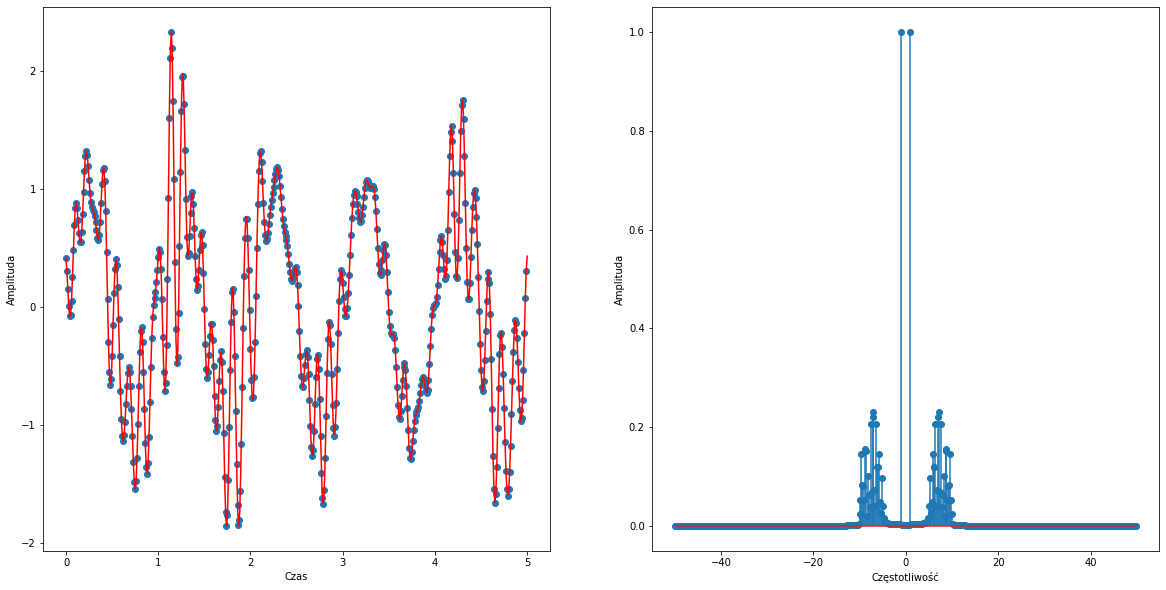

In [73]:
# Dodaj szum do sygnału
from random import uniform

random.seed(10)

def random_sin():
    A = uniform(0.02, 0.08)
    f = uniform(5.0, 10.0)
    p = uniform(0, 2*pi)
    return lambda t: A*sin(2*pi*t*f + p)
    
def rysuj_fale3(f, T, LP=1, w=40):
    noise = [random_sin() for _ in range(100)]
    func = lambda t: sin(2*pi*t*f) + sum(g(t) for g in noise)
    rysuj_sygnal(func, x2=LP*T, krok=1/w)

rysuj_fale3(f=1, T=1, w=100, LP=5)

### d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz, LP=10. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

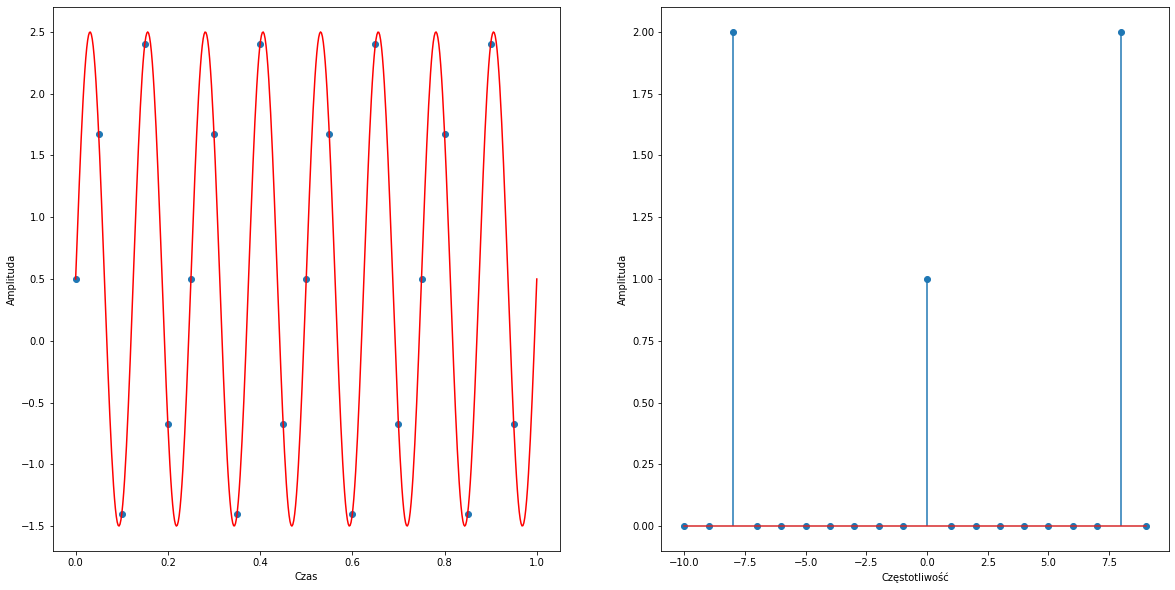

In [74]:
# Wyrysuj sygnał
def rysuj_fale4(f, T, LP=1, w=40):
    func = lambda t: 0.5 + 2*sin(4*pi*t*f)
    rysuj_sygnal(func, x2=LP*T, krok=1/w)
    
rysuj_fale4(f=4, T=1, w=20)

### e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal).

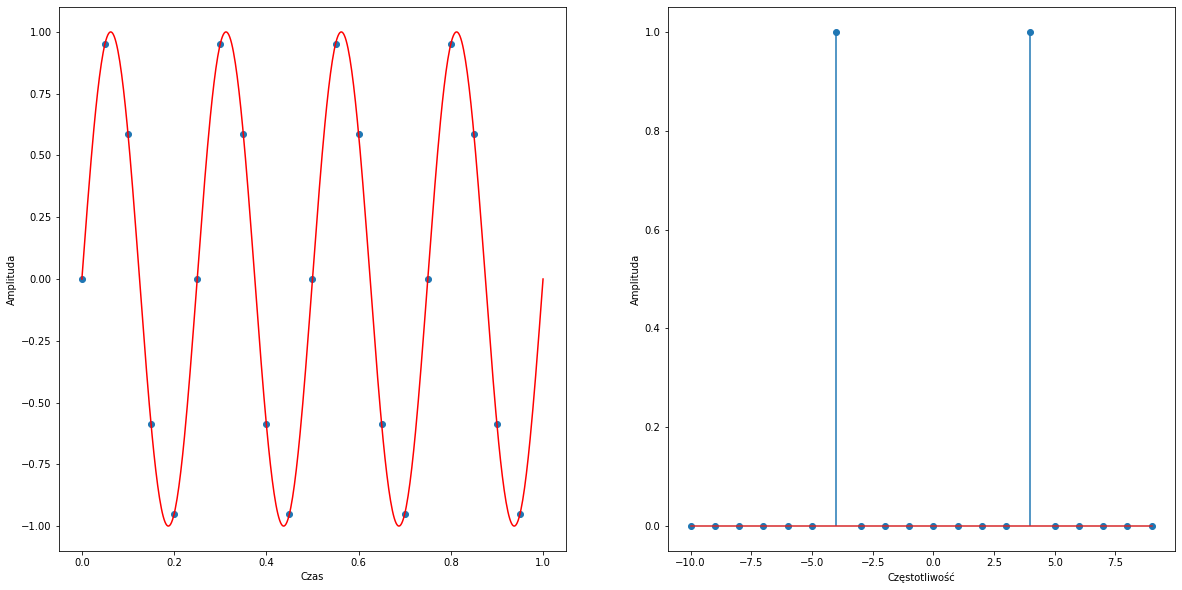

array([ 180., -108.,  -50.,   -3.,  -90.,  130., -149.,  165., -113.,
        -11.,    0.,   11.,  113., -165.,  149., -130.,   90.,    3.,
         50.,  108.])

In [75]:
#  faza = 0
def rysuj_fale_faza_0(f, T, LP=1, w=40):
    func = lambda t: sin(2*pi*t*f)
    rysuj_sygnal(func, x2=LP*T, krok=1/w)
    ys = [func(x) for x in np.arange(0, LP*T, 1/w)]
    yf = np.fft.fft(ys)
    return np.round(np.angle(yf, deg=True))
    
rysuj_fale_faza_0(f=4, T=1, w=20)

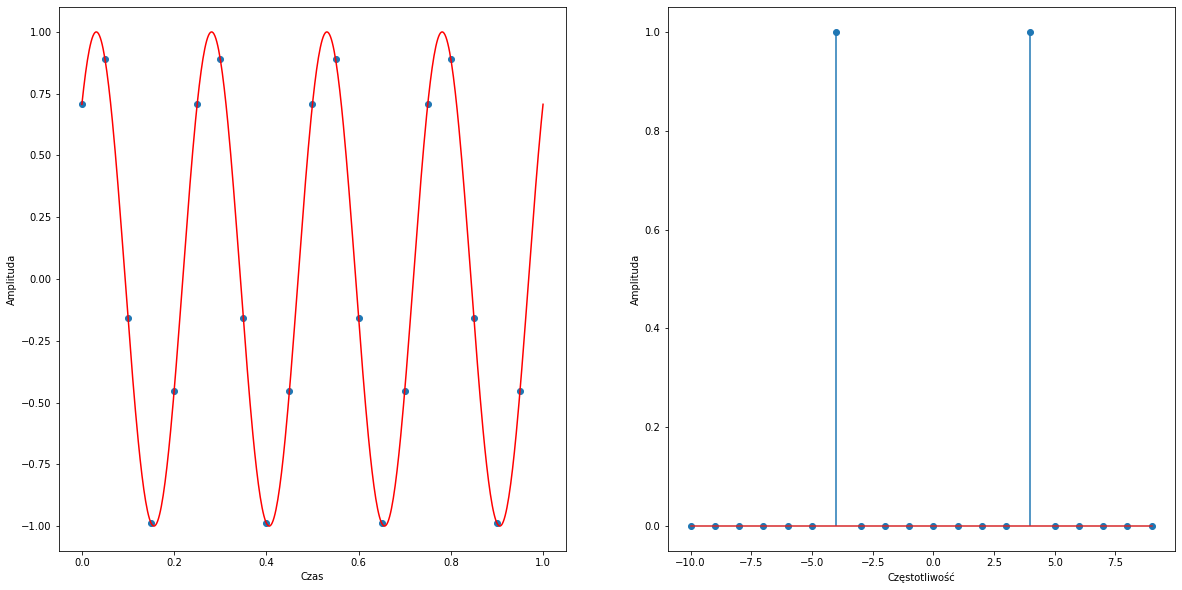

array([ 180., -135.,  -60.,  -44.,  -45.,  109.,  140., -164., -106.,
        -52.,    0.,   52.,  106.,  164., -140., -109.,   45.,   44.,
         60.,  135.])

In [78]:
# faza = pi/4
def rysuj_fale_faza_pi_0_25(f, T, LP=1, w=40):
    func = lambda t: sin(2*pi*t*f+pi/4)
    rysuj_sygnal(func, x2=LP*T, krok=1/w)
    ys = [func(x) for x in np.arange(0, LP*T, 1/w)]
    yf = np.fft.fft(ys)
    return np.round(np.angle(yf, deg=True))
    
rysuj_fale_faza_pi_0_25(f=4, T=1, w=20)

# Zadanie 4

### Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona? Uwaga: operacje fft() oraz ifft() działają na liczbach zmiennoprzecinkowych, zatem mają ograniczoną precyzję. To jest jedna z przyczyn tego, że te dwie operacje nie muszą być względem siebie odwrotne dla każdego argumentu. Skonstruuj odpowiedni test sprawdzający, czy fft() oraz ifft() rzeczywiście działają (prawie) odwrotnie. Taki test ma zwracać prawdę wtedy i tylko wtedy, kiedy x oraz ifft(fft(x)) są (prawie) identyczne. Możesz też sprawdzić, czy odpowiednie drobne przekształcenie danych wejściowych (x) spowoduje, że fft() i ifft() będą faktycznie idealnie odwrotne pomimo ograniczonej precyzji liczb zmiennoprzecinkowych.

In [79]:
# wygeneruj wektor x
x = np.random.random(10)
x

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981])

In [83]:
# oblicz fft z x
x_fft = fft(x)
x_fft

array([ 4.1138726 +0.00000000e+00j, -0.14709962-5.67517931e-01j,
       -0.62544264+7.00781541e-02j,  1.29969632+4.46958893e-02j,
        1.05879957+6.69277987e-01j,  0.42742659-1.38777878e-17j,
        1.05879957-6.69277987e-01j,  1.29969632-4.46958893e-02j,
       -0.62544264-7.00781541e-02j, -0.14709962+5.67517931e-01j])

In [84]:
# oblicz ifft z powyższego
ifft(x_fft)

array([0.77132064+0.00000000e+00j, 0.02075195+1.38777878e-18j,
       0.63364823-2.51051540e-18j, 0.74880388+1.38777878e-18j,
       0.49850701-9.58931553e-19j, 0.22479665+1.38777878e-18j,
       0.19806286-9.58931553e-19j, 0.76053071+1.38777878e-18j,
       0.16911084-2.51051540e-18j, 0.08833981+1.38777878e-18j])